In [1]:
import os
import sys

import yaml
import pandas as pd

from autogluon.tabular import TabularDataset, TabularPredictor


os.chdir('..')
sys.path.append(os.getcwd())
from src.model_evaluation import AutogluonWrapper

# Initial configurations
config_filepath = 'config.yml'

with open(config_filepath, 'r') as f:
    config = yaml.safe_load(f)

# Model Evaluation

In [2]:
train_size = 0.80
random_state = 1337

# Carry-over from modeling
abt = pd.read_csv(config['filepaths']['abt'])

train_data = abt.sample(frac=train_size, random_state=random_state)
test_data = abt.loc[~abt.index.isin(train_data.index)]
train_dataset = TabularDataset(train_data)
test_dataset = TabularDataset(test_data)

## 1 Model Loading

In [3]:
predictor = TabularPredictor.load(config['filepaths']['model'])

## 2 Feature Importance

In [4]:
predictor.feature_importance(test_dataset)

,importance,stddev,p_value,n,p99_high,p99_low
Sex,0.183217,0.028577,0.000069,5,0.242058,0.124376
Pclass,0.110490,0.021780,0.000172,5,0.155334,0.065645
Age,0.053147,0.016099,0.000898,5,0.086295,0.019999
Fare,0.009790,0.007973,0.025803,5,0.026207,-0.006627
SibSp,-0.004196,0.010605,0.786841,5,0.017641,-0.026033
Parch,-0.005594,0.005851,0.950350,5,0.006452,-0.017641
Embarked,-0.006993,0.000000,0.500000,5,-0.006993,-0.006993


## 3 SHAP

In [5]:
import shap

In [6]:
feature_names = train_data.columns

In [7]:
wrapper = AutogluonWrapper(predictor, feature_names)

In [10]:
explainer = shap.KernelExplainer(
    wrapper.predict_binary_prob, train_data, feature_names=feature_names)

Using 571 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [12]:
shap_values = explainer(test_data)

  0%|          | 0/143 [00:00<?, ?it/s]

In [19]:
shap_explanation = shap.Explanation(shap_values.values,
                                    shap_values.base_values[0],
                                    shap_values.data,
                                    feature_names=feature_names)

/tmp/ipykernel_58015/3427532107.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_explanation, plot_type='bar', plot_size=(14, 8))


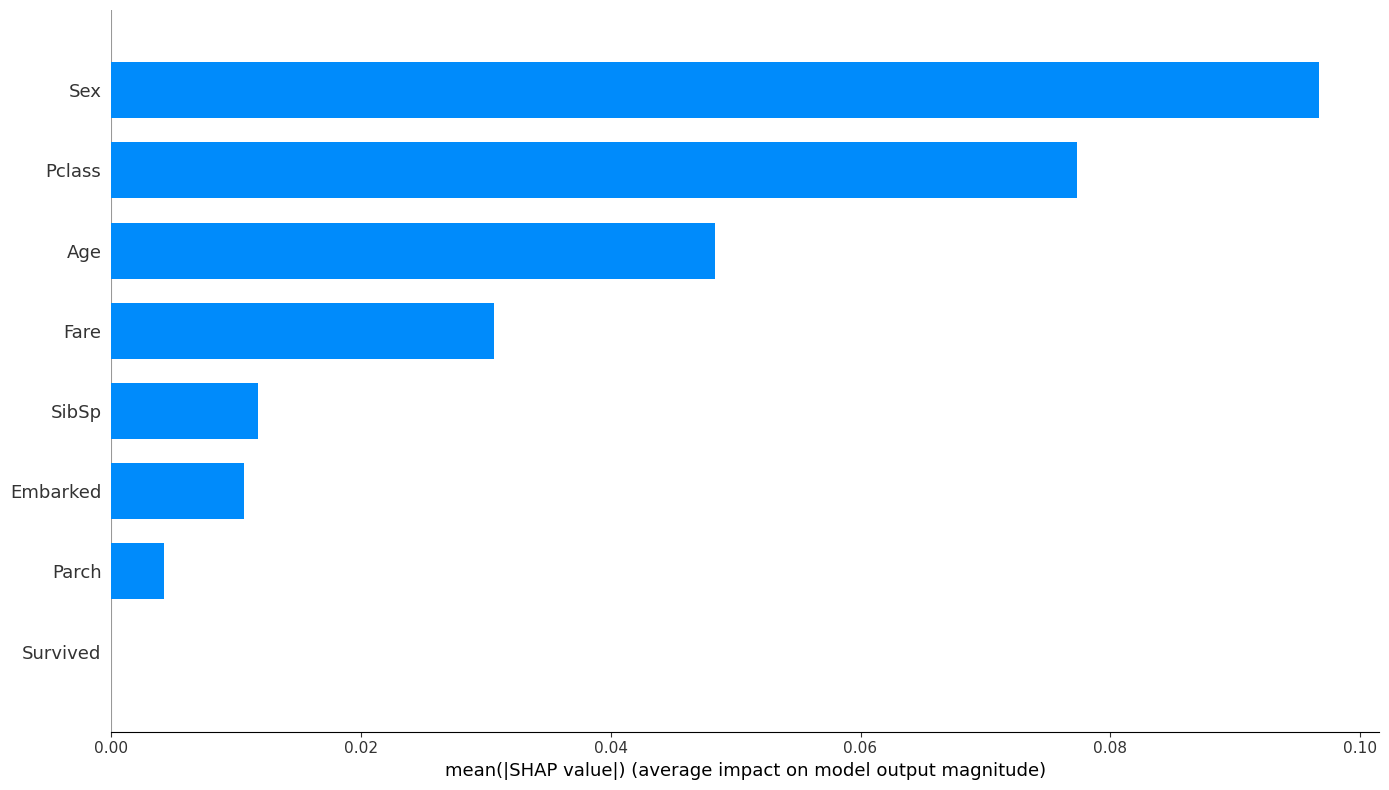

In [20]:
shap.summary_plot(shap_explanation, plot_type='bar', plot_size=(14, 8))

/tmp/ipykernel_58015/2505695019.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_explanation, plot_size=(14, 8))


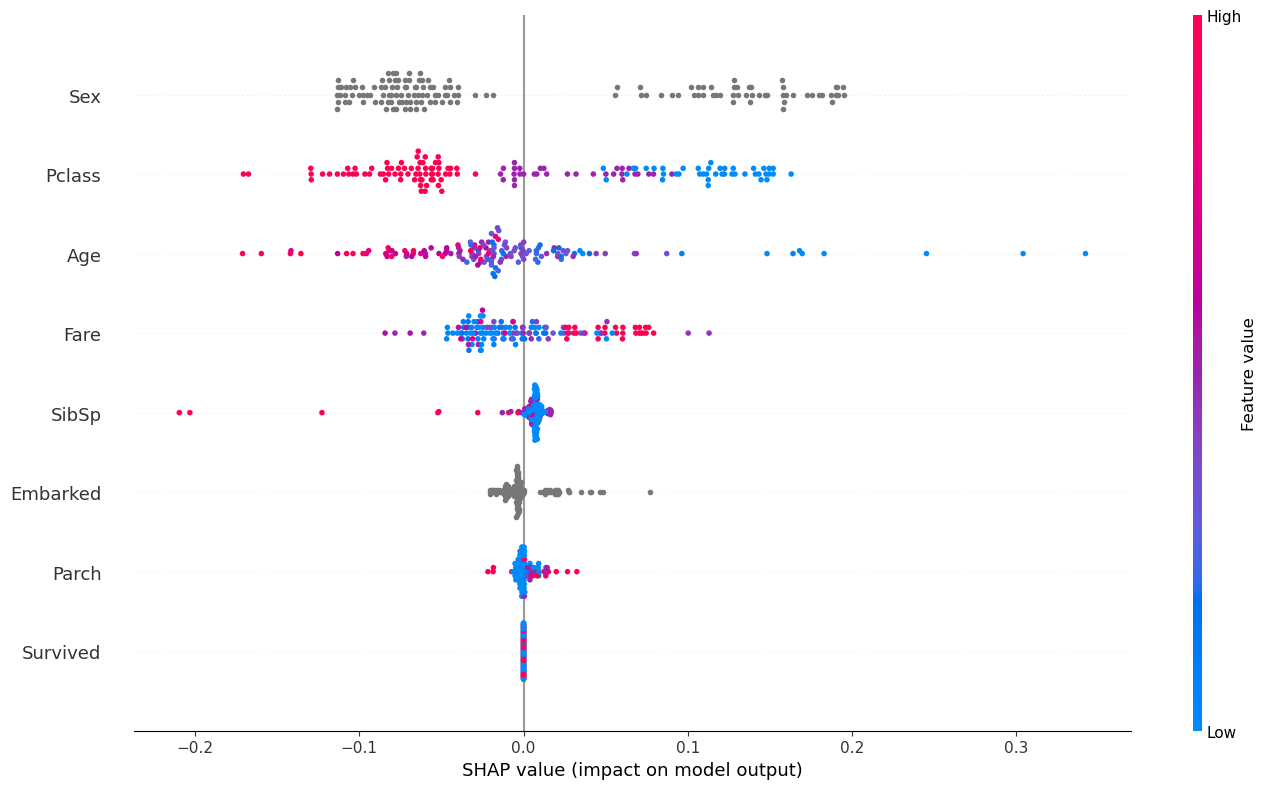

In [21]:
shap.summary_plot(shap_explanation, plot_size=(14, 8))